In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_excel('/home/rcintra/project/dio/tech_unimed_bh/project_01/Datasets/Aracaju.xlsx')
df2 = pd.read_excel('/home/rcintra/project/dio/tech_unimed_bh/project_01/Datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/home/rcintra/project/dio/tech_unimed_bh/project_01/Datasets/Natal.xlsx')
df4 = pd.read_excel('/home/rcintra/project/dio/tech_unimed_bh/project_01/Datasets/Recife.xlsx')
df5 = pd.read_excel('/home/rcintra/project/dio/tech_unimed_bh/project_01/Datasets/Salvador.xlsx')

In [4]:
df = pd.concat([df1, df2, df3, df4, df5])

In [5]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [6]:
df['Data'] = df['Data'].astype('int64')

In [7]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [8]:
df['Data'] = pd.to_datetime(df['Data'])

In [9]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [10]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [11]:
df['Ano_Venda'] = df['Data'].dt.year

In [12]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
87,Fortaleza,2019-01-01,42.04,1002,5,210.20,2019
73,Salvador,2019-01-01,8.39,1037,1,8.39,2019
53,Salvador,2019-01-01,39.50,1035,3,118.50,2019
124,Fortaleza,2019-03-02,47.98,983,7,335.86,2019
60,Salvador,2019-01-01,96.01,1034,2,192.02,2019


In [13]:
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [14]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
126,Fortaleza,2019-03-02,41.87,980,8,334.96,2019,3,2
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2
120,Fortaleza,2019-03-02,184.90,982,4,739.60,2019,3,2
175,Salvador,2019-01-02,16.53,1036,2,33.06,2019,1,2
109,Recife,2019-03-02,18.90,982,6,113.40,2019,3,2


In [15]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [16]:
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [17]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
184,Natal,2019-01-02,167.16,1037,1,167.16,2019,1,2,366 days
140,Recife,2019-03-02,166.89,983,5,834.45,2019,3,2,425 days
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,2018,1,1,0 days
39,Fortaleza,2019-01-01,176.51,1005,1,176.51,2019,1,1,365 days
97,Salvador,2019-01-01,39.91,1037,3,119.73,2019,1,1,365 days


In [18]:
df['trimestre_venda'] = df['Data'].dt.quarter

In [19]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
232,Salvador,2019-01-03,167.76,1034,3,503.28,2019,1,3,367 days,1
152,Natal,2019-01-02,20.07,1035,1,20.07,2019,1,2,366 days,1
172,Salvador,2019-01-02,6.70,1035,1,6.70,2019,1,2,366 days,1
96,Aracaju,2018-01-01,85.92,1521,2,171.84,2018,1,1,0 days,1


In [20]:
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [21]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
113,Salvador,2019-03-02,18.90,1034,3,56.70,2019,3,2,425 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days,1
136,Salvador,2019-03-02,13.81,1036,1,13.81,2019,3,2,425 days,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days,1
45,Natal,2019-03-11,431.00,852,3,1293.00,2019,3,11,434 days,1


In [22]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot: >

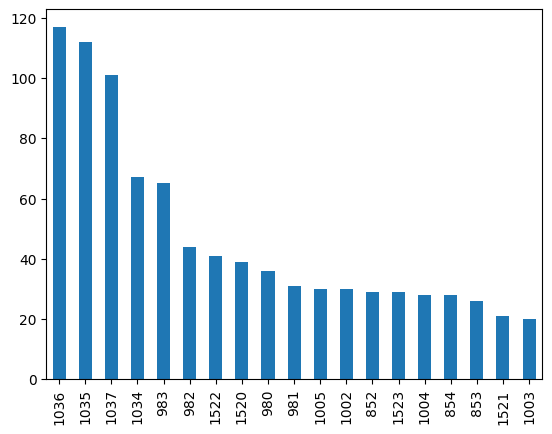

In [26]:
df['LojaID'].value_counts(ascending=False).plot.bar()

<AxesSubplot: >

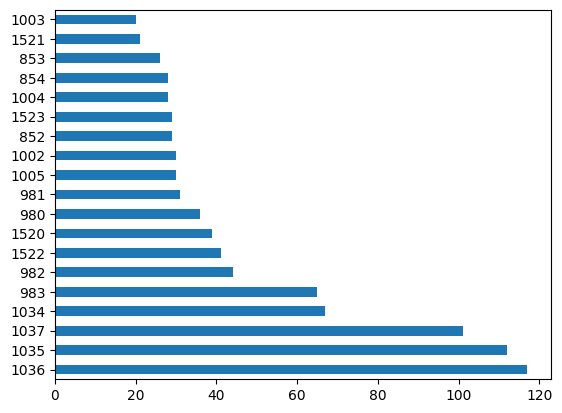

In [27]:
df['LojaID'].value_counts(ascending=False).plot.barh()

<AxesSubplot: >

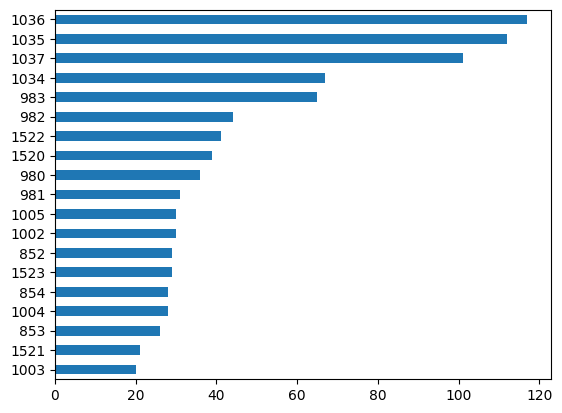

In [28]:
df['LojaID'].value_counts(ascending=True).plot.barh()

<AxesSubplot: ylabel='Receita'>

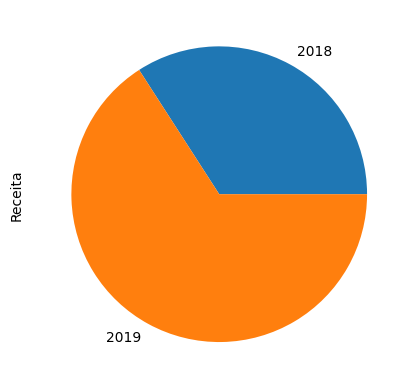

In [29]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [30]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

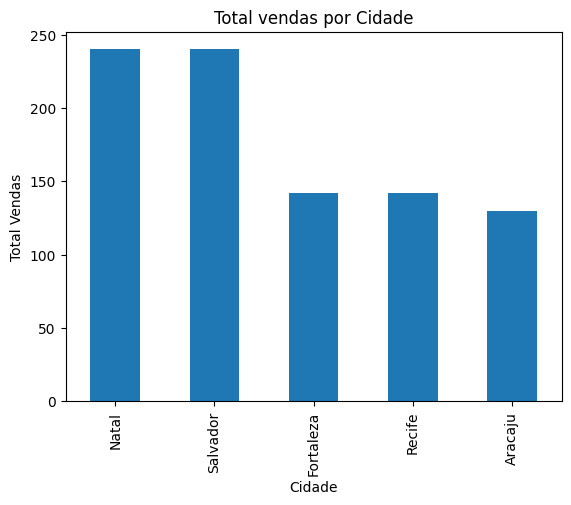

In [32]:
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

Text(0, 0.5, 'Total Vendas')

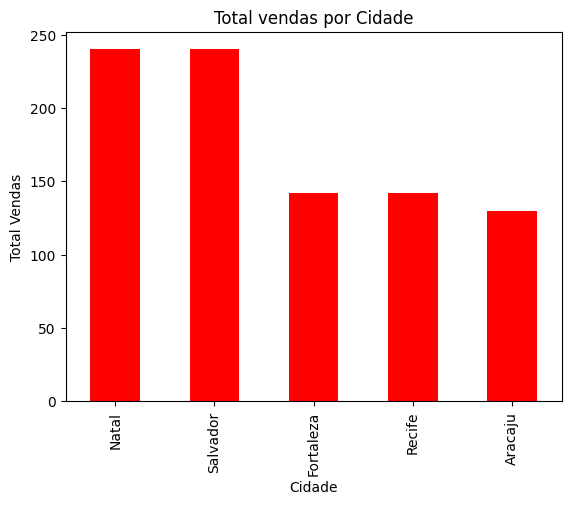

In [33]:
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

In [34]:
plt.style.use('ggplot')

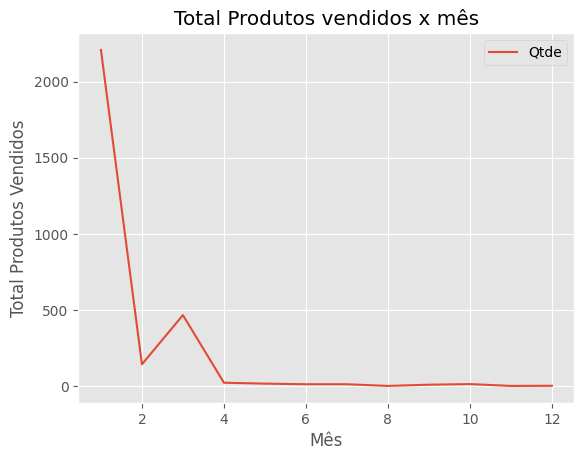

In [36]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total Produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()

In [37]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [38]:
df_2019 = df[df['Ano_Venda'] == 2019]

<AxesSubplot: xlabel='mes_venda'>

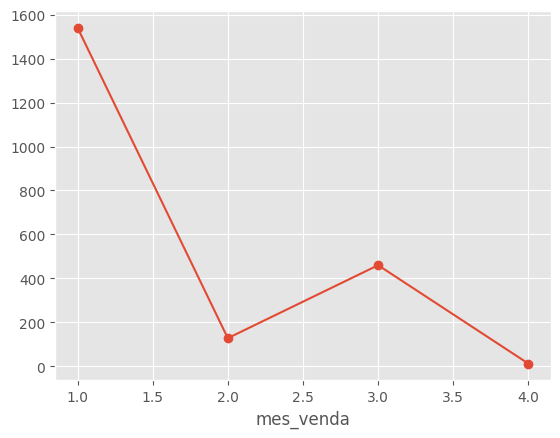

In [40]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

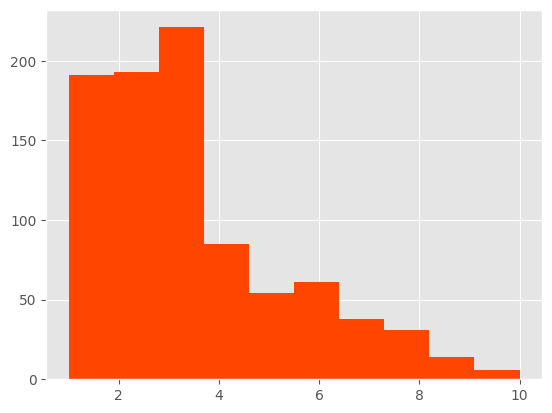

In [43]:
plt.hist(df['Qtde'], color='orangered')

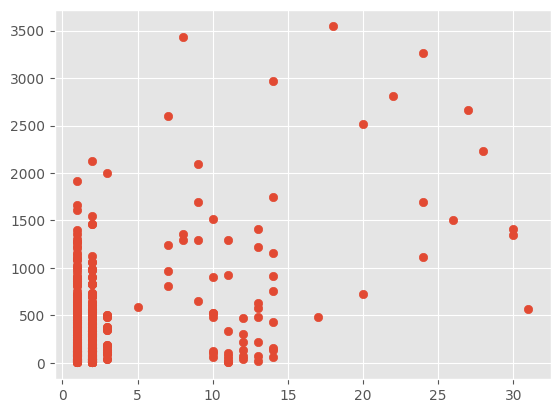

In [44]:
plt.scatter(x = df_2019['dia_venda'], y = df_2019['Receita'])

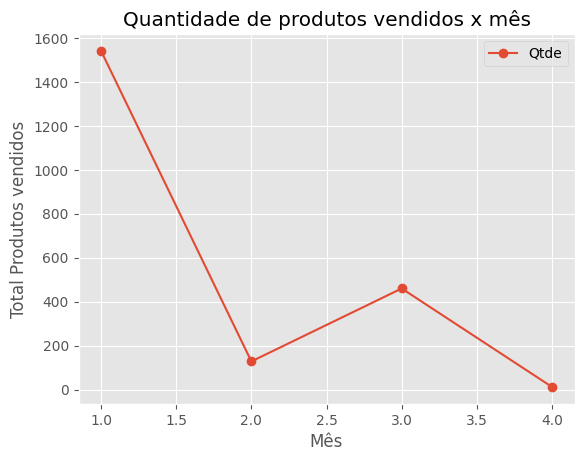

In [46]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos vendidos')
plt.legend()
plt.savefig('graficoQtde_x_Mes.png')